<a href="https://colab.research.google.com/github/RonitGandhi/Robo-Baseball-Umpries/blob/main/Robotic_Umprires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial Data Sourcing

In [ ]:
!pip install pybaseball

In [ ]:
from pybaseball import statcast
import pandas as pd

# Define the date range for the last five years
start_date = '2020-01-01'
end_date = '2024-12-31'

# Fetch Statcast data for all players
data = statcast(start_dt=start_date, end_dt=end_date)

# Display the first few rows of the data
print(data.head())

# Save data to a CSV file for later use
data.to_csv('statcast_data_2020_2024.csv', index=False)


This is a large query, it may take a moment to complete


/usr/local/lib/python3.10/dist-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)


Skipping offseason dates
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates


100%|██████████| 1081/1081 [18:16<00:00,  1.01s/it]


     pitch_type  game_date  release_speed  release_pos_x  release_pos_z  \
1770         FF 2024-06-08           98.9           -2.3           5.92   
1814         FF 2024-06-08           98.9          -2.53           5.73   
1850         FF 2024-06-08           97.6          -2.41           5.75   
1896         FF 2024-06-08           96.5           -2.4           5.78   
1957         FF 2024-06-08           97.2          -2.36           5.82   

          player_name  batter  pitcher     events      description  ...  \
1770  Kopech, Michael  680776   656629  strikeout  swinging_strike  ...   
1814  Kopech, Michael  680776   656629        NaN             foul  ...   
1850  Kopech, Michael  680776   656629        NaN             foul  ...   
1896  Kopech, Michael  680776   656629        NaN             ball  ...   
1957  Kopech, Michael  680776   656629        NaN    called_strike  ...   

      post_home_score  post_bat_score  post_fld_score  if_fielding_alignment  \
1770              

In [ ]:
data = pd.read_csv('/content/statcast_data_2018_2022.csv')

In [ ]:
# Select relevant columns for batters
batter_columns = [
    'game_date', 'player_name', 'batter', 'pitcher', 'pitch_type',
    'release_speed', 'plate_x', 'plate_z', 'events', 'description',
    'stand', 'home_team', 'away_team', 'inning', 'inning_topbot',
    'hit_distance_sc', 'launch_speed', 'launch_angle', 'bb_type'
]

batter_data_filtered = data[batter_columns]

# Display the first few rows of the filtered data
print(batter_data_filtered.head())

print (data.columns)
pitcher_columns = [
    'game_date', 'player_name', 'batter', 'pitcher', 'pitch_type',
    'release_speed', 'release_pos_x', 'release_pos_z', 'pfx_x', 'pfx_z',
    'plate_x', 'plate_z', 'release_extension', 'zone',
    'events', 'description', 'home_team', 'away_team', 'inning', 'inning_topbot'
]

# Filter the data to include only the selected columns
pitcher_data_filtered = data[pitcher_columns]

# Display the first few rows of the filtered data
print(pitcher_data_filtered.head())


    game_date      player_name  batter  pitcher pitch_type  release_speed  \
0  2024-06-08  Kopech, Michael  680776   656629         FF           98.9   
1  2024-06-08  Kopech, Michael  680776   656629         FF           98.9   
2  2024-06-08  Kopech, Michael  680776   656629         FF           97.6   
3  2024-06-08  Kopech, Michael  680776   656629         FF           96.5   
4  2024-06-08  Kopech, Michael  680776   656629         FF           97.2   

   plate_x  plate_z     events      description stand home_team away_team  \
0    -0.81     3.35  strikeout  swinging_strike     L       CWS       BOS   
1     1.12     2.95        NaN             foul     L       CWS       BOS   
2     0.28     2.73        NaN             foul     L       CWS       BOS   
3    -0.79     4.24        NaN             ball     L       CWS       BOS   
4    -0.45     3.21        NaN    called_strike     L       CWS       BOS   

   inning inning_topbot  hit_distance_sc  launch_speed  launch_angle bb_ty

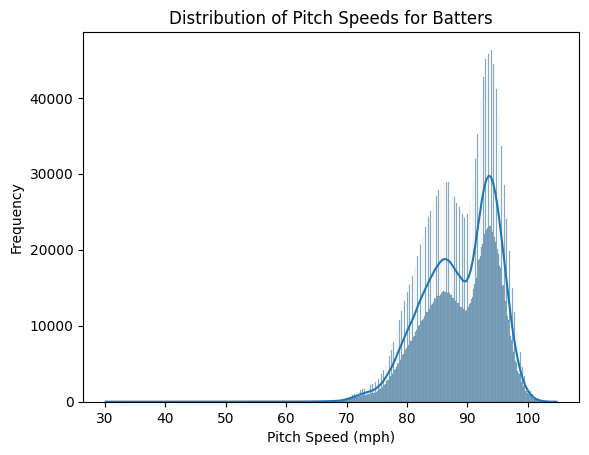

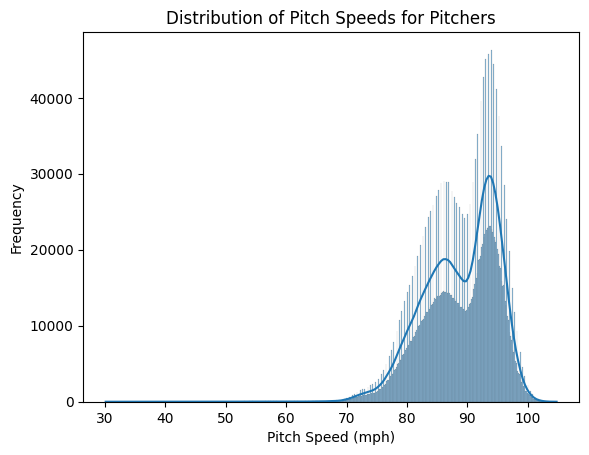

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of pitch speeds for batters
sns.histplot(batter_data_filtered['release_speed'], kde=True)
plt.title('Distribution of Pitch Speeds for Batters')
plt.xlabel('Pitch Speed (mph)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of pitch speeds for pitchers
sns.histplot(pitcher_data_filtered['release_speed'], kde=True)
plt.title('Distribution of Pitch Speeds for Pitchers')
plt.xlabel('Pitch Speed (mph)')
plt.ylabel('Frequency')
plt.show()


# Internation League - 2023 season

League Batting Data
            Finals  Aff  BatAge   R/G    G    PA    AB    R     H   2B  ...  \
0  Louisville Bats  CIN    27.3  6.09  148  5924  5047  902  1406  299  ...   
1        Iowa Cubs  CHC    25.8  6.07  147  5762  4888  892  1297  302  ...   
2  St. Paul Saints  MIN    27.0  5.91  148  5811  4944  875  1302  272  ...   
3    Norfolk Tides  BAL    25.3  5.88  149  5800  5042  876  1384  284  ...   
4     Durham Bulls  TBR    25.3  5.87  150  5880  5030  881  1320  306  ...   

      BA    OBP    SLG    OPS    TB  GDP  HBP  SH  SF  IBB  
0  0.279  0.376  0.477  0.852  2405  119   84   9  52    9  
1  0.265  0.368  0.466  0.834  2278   97   90  12  43    6  
2  0.263  0.364  0.456  0.821  2256  110  101   7  48    6  
3  0.275  0.360  0.462  0.821  2327  104   88   7  50    7  
4  0.262  0.360  0.469  0.828  2357   80   70   5  53    4  

[5 rows x 27 columns]

League Fielding Data
                   Finals  Aff    G  CG    PO     A   E   DP   Fld%  PB   SB  \
0         Loui

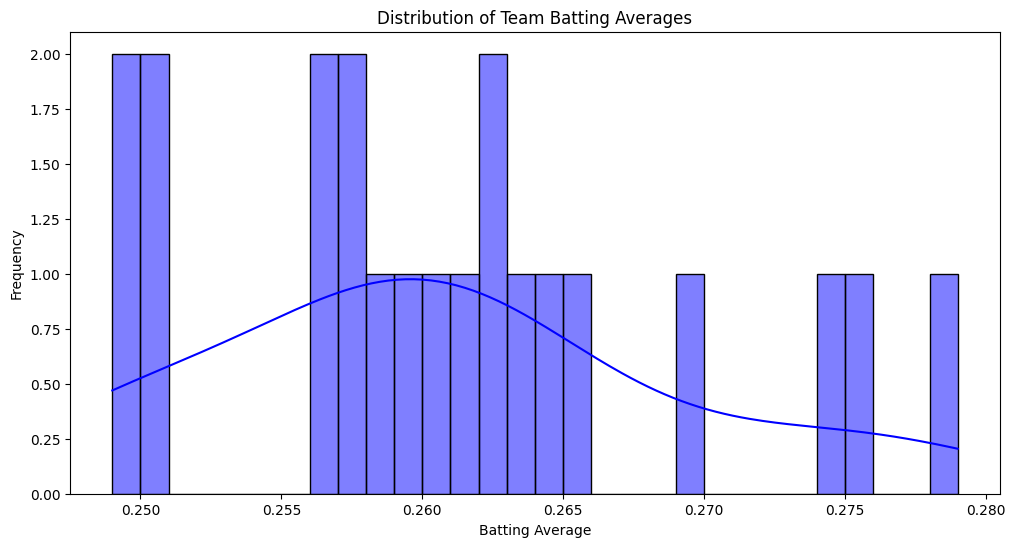

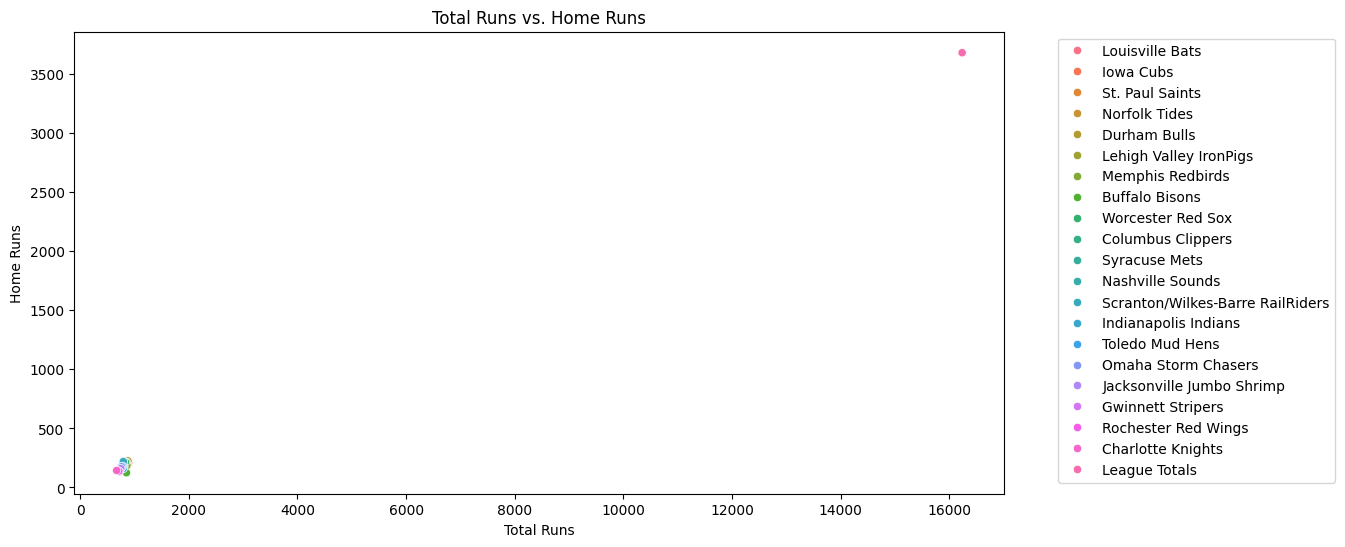

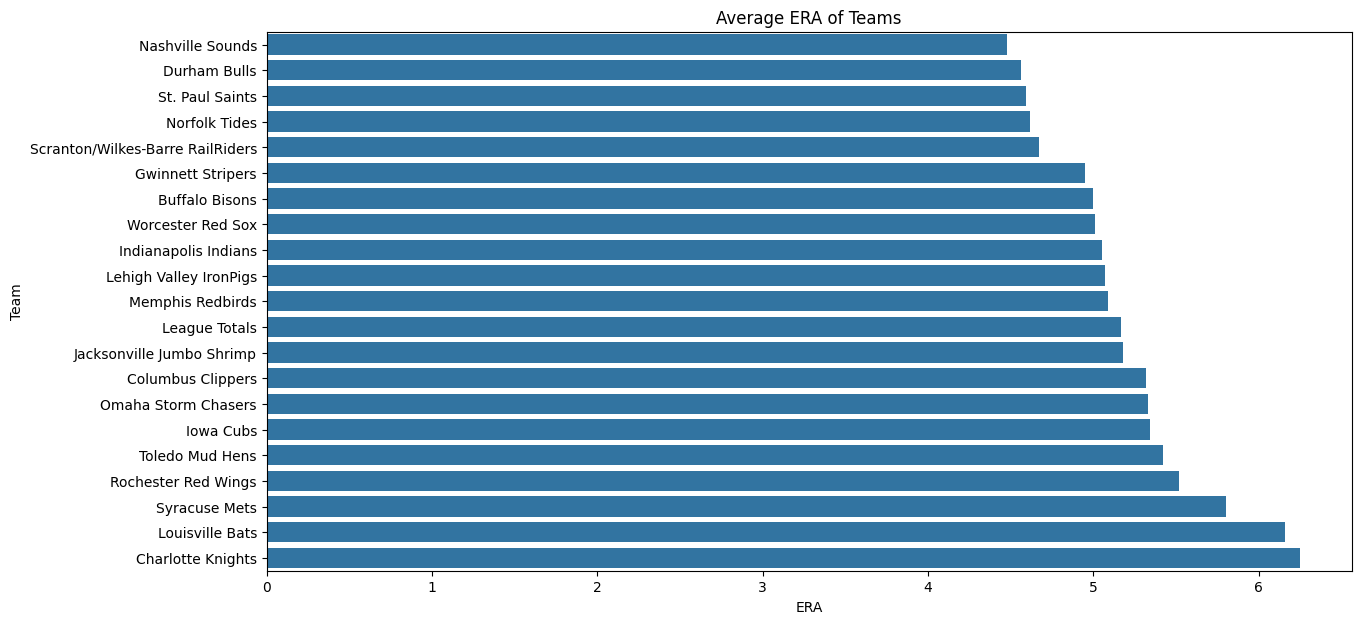

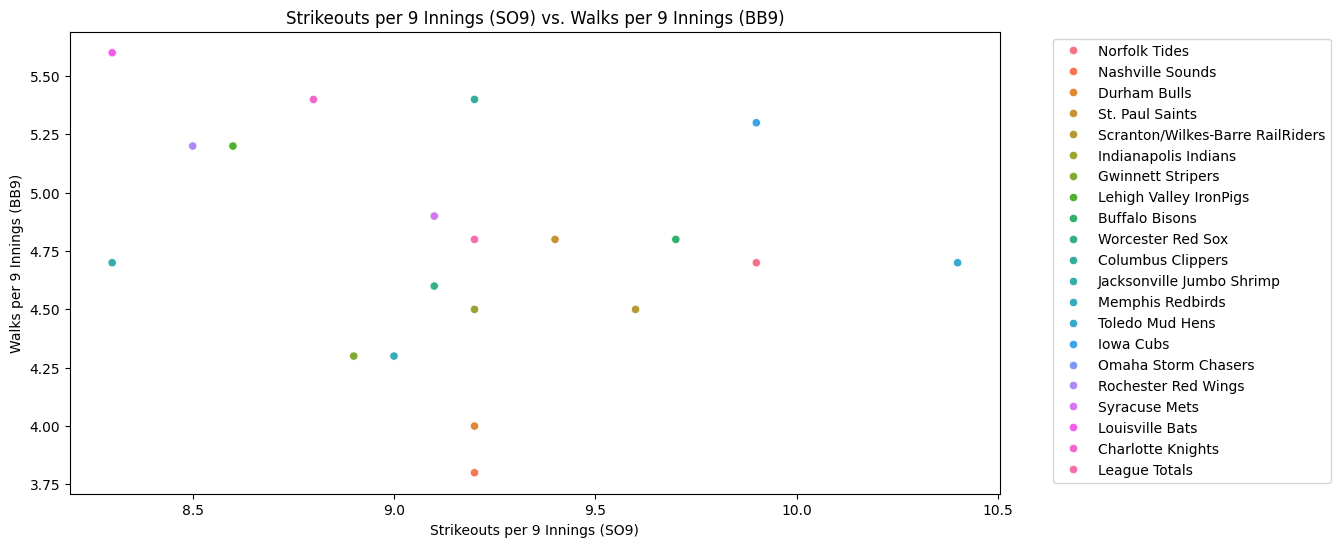

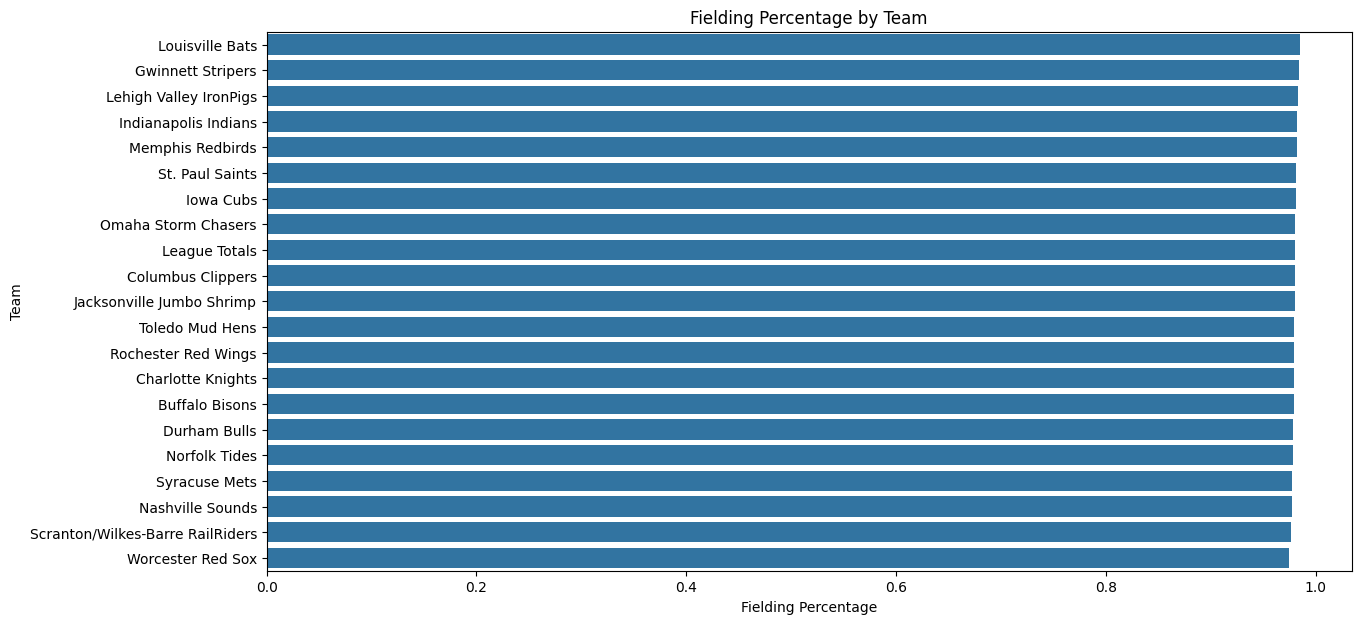

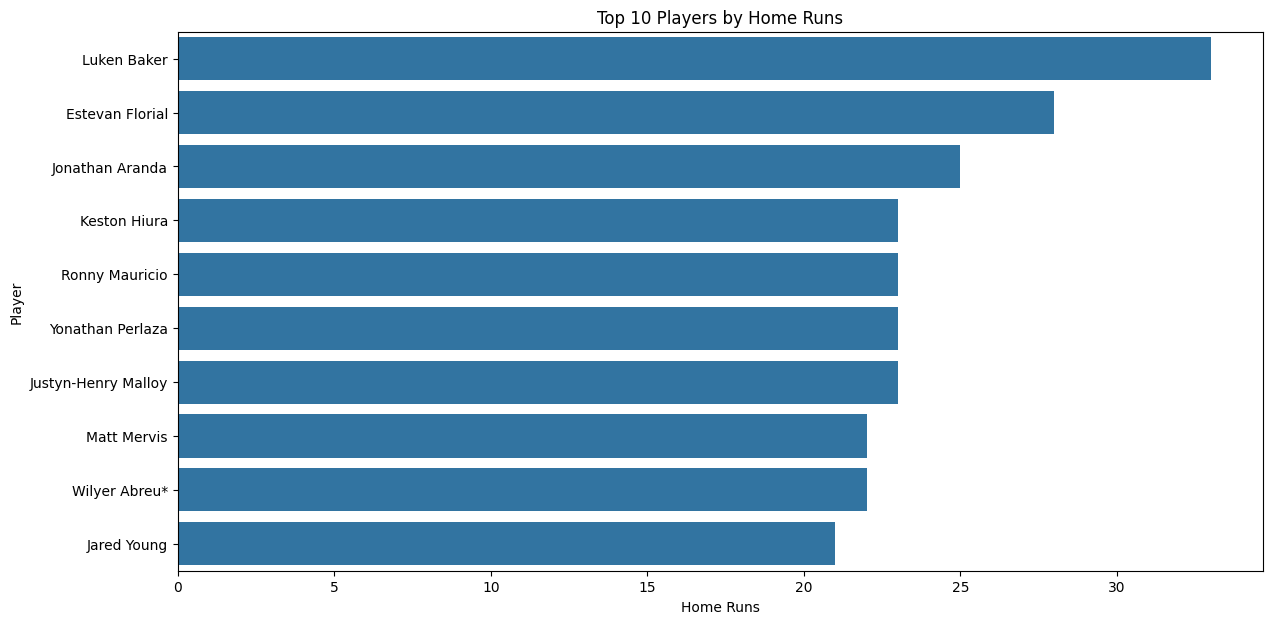

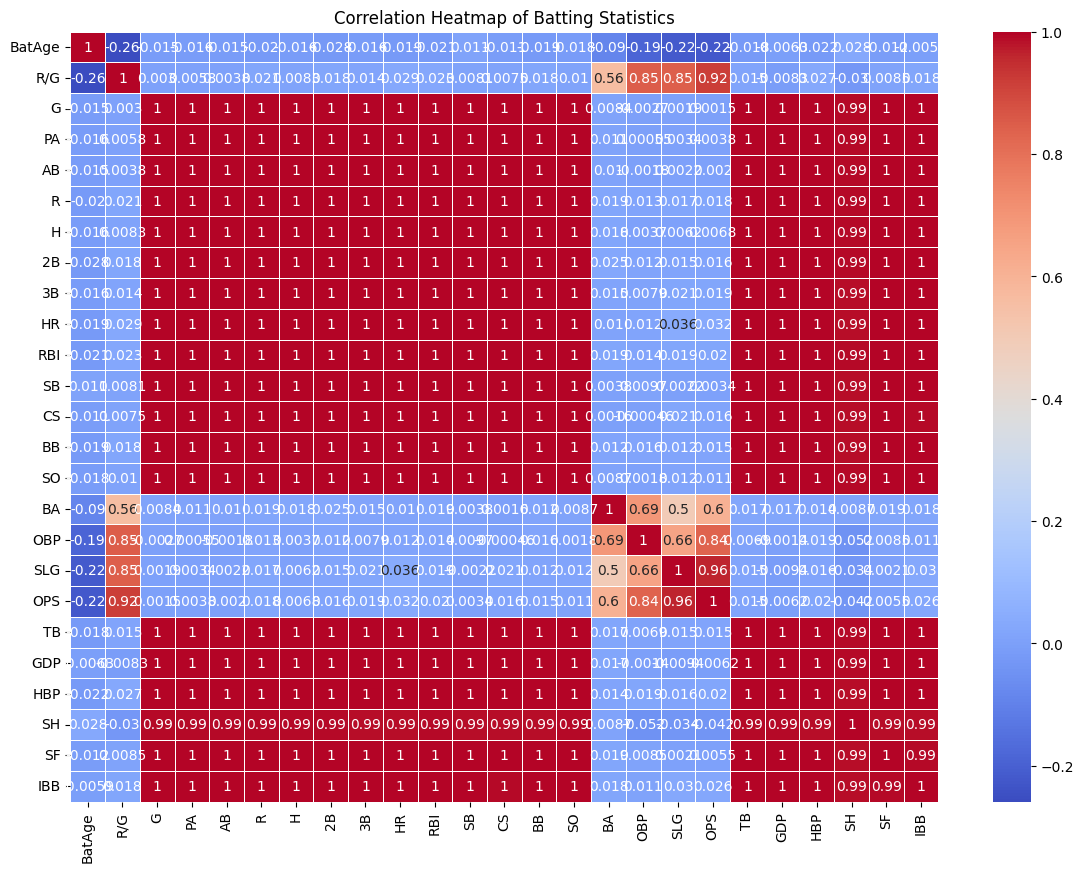

<ipython-input-14-6fa0388129ed>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='HR', data=hr_by_age, palette='viridis')


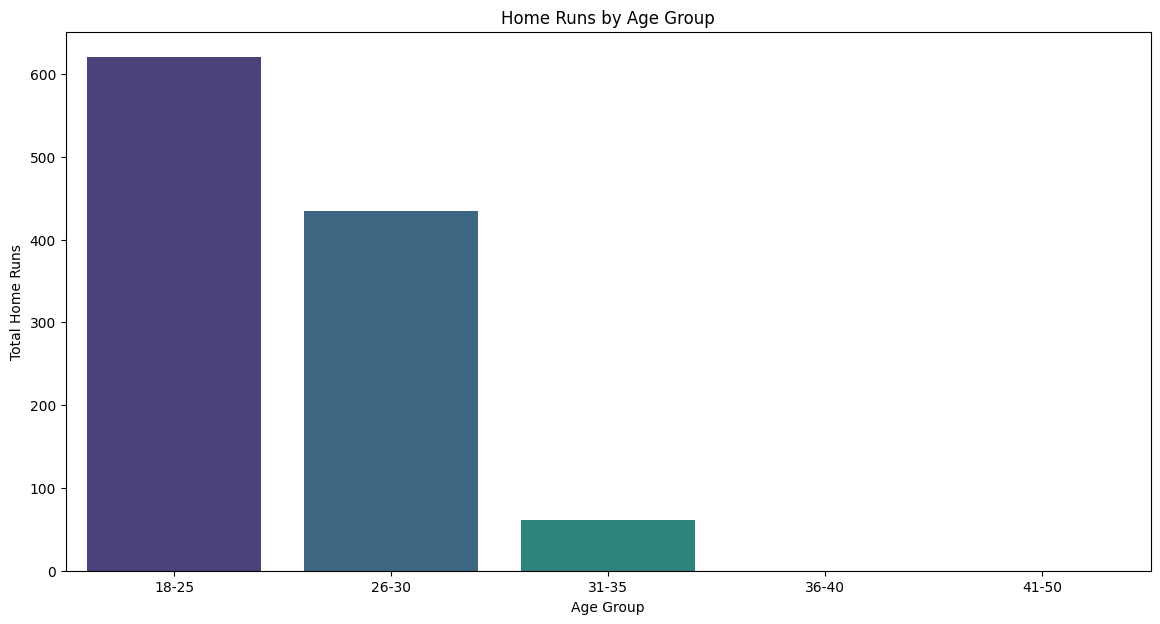

<ipython-input-14-6fa0388129ed>:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BA', y='Finals', data=avg_ba_by_team.sort_values(by='BA', ascending=False), palette='coolwarm')


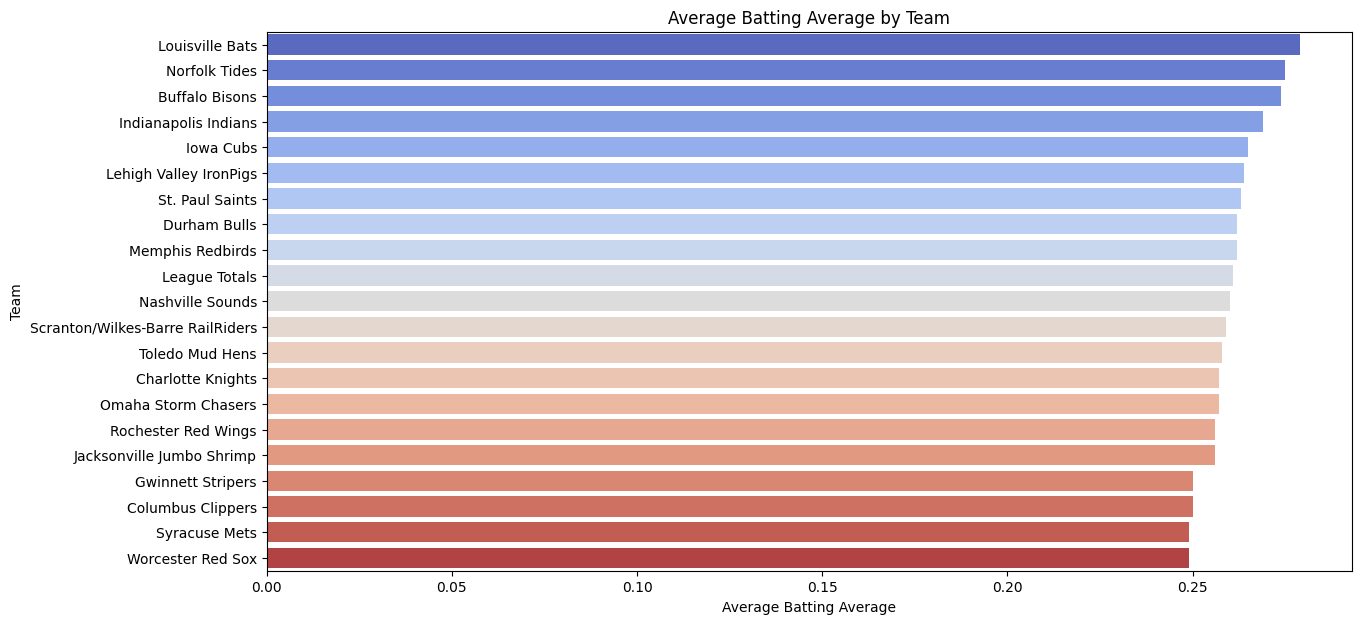

<ipython-input-14-6fa0388129ed>:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ERA', y='Name', data=top_10_era, palette='magma')


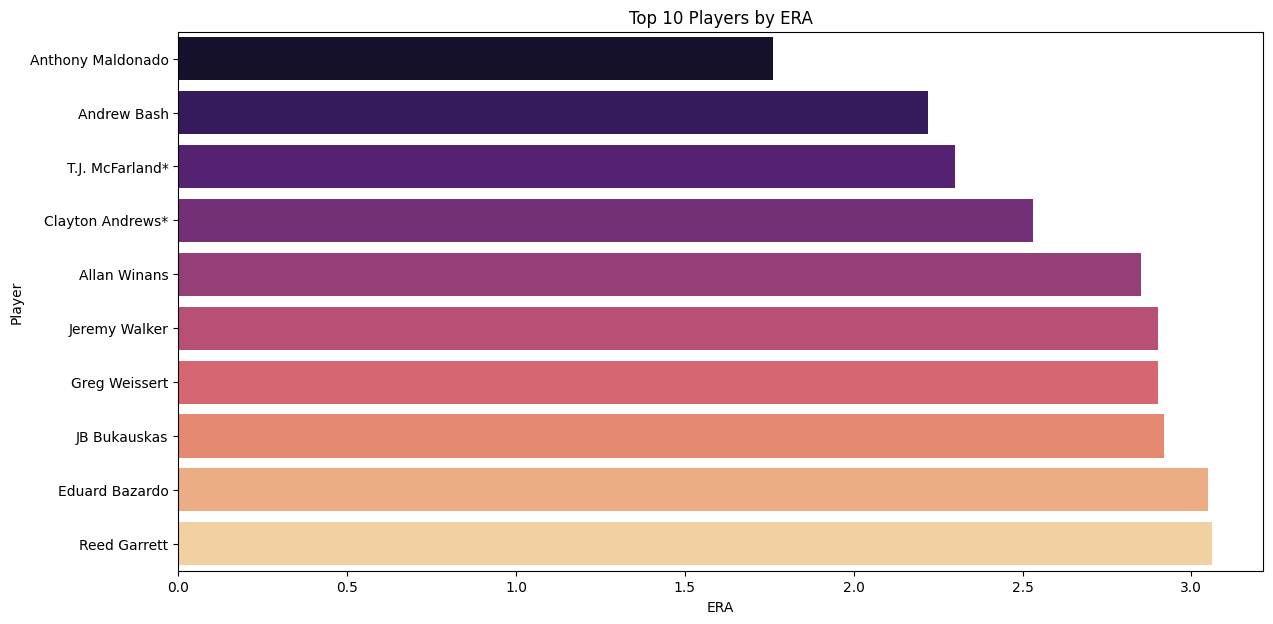

<ipython-input-14-6fa0388129ed>:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SO', y='Name', data=top_10_so, palette='plasma')


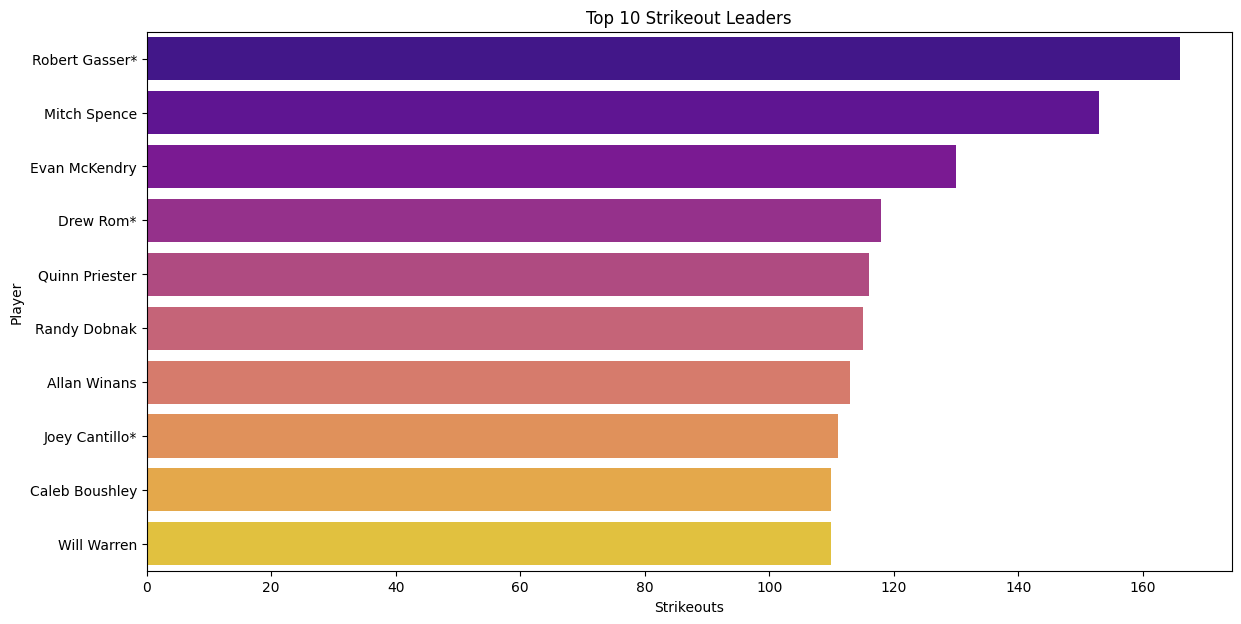

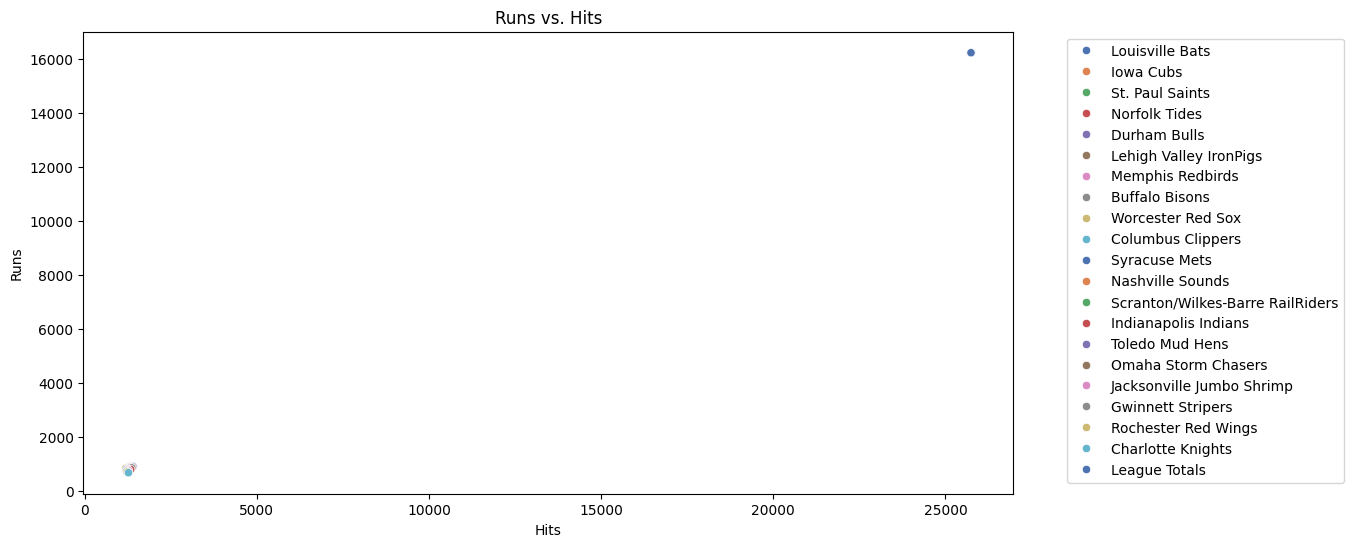

In [14]:
import pandas as pd

# Load the data from the Excel files
batting_data = pd.read_csv('League Batting.csv')
fielding_data = pd.read_csv('League Fielding.csv')
pitching_data = pd.read_csv('League Pitching.csv')
player_batting_data = pd.read_csv('League Player Batting.csv', encoding='latin1')
player_pitching_data = pd.read_csv('League Player Pitching.csv', encoding='latin1')

# Display the first few rows of each dataset
print("League Batting Data")
print(batting_data.head())

print("\nLeague Fielding Data")
print(fielding_data.head())

print("\nLeague Pitching Data")
print(pitching_data.head())

print("\nLeague Player Batting Data")
print(player_batting_data.head())

print("\nLeague Player Pitching Data")
print(player_pitching_data.head())

import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of team batting averages
plt.figure(figsize=(12, 6))
sns.histplot(batting_data['BA'], bins=30, kde=True, color='blue')
plt.title('Distribution of Team Batting Averages')
plt.xlabel('Batting Average')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of total runs vs. home runs
plt.figure(figsize=(12, 6))
sns.scatterplot(x='R', y='HR', data=batting_data, hue='Finals')
plt.title('Total Runs vs. Home Runs')
plt.xlabel('Total Runs')
plt.ylabel('Home Runs')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Bar plot of average ERA of teams
plt.figure(figsize=(14, 7))
sns.barplot(x='ERA', y='Finals', data=pitching_data.sort_values(by='ERA'))
plt.title('Average ERA of Teams')
plt.xlabel('ERA')
plt.ylabel('Team')
plt.show()

# Scatter plot of SO9 vs. BB9
plt.figure(figsize=(12, 6))
sns.scatterplot(x='SO9', y='BB9', data=pitching_data, hue='Finals')
plt.title('Strikeouts per 9 Innings (SO9) vs. Walks per 9 Innings (BB9)')
plt.xlabel('Strikeouts per 9 Innings (SO9)')
plt.ylabel('Walks per 9 Innings (BB9)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Bar plot of fielding percentage by team
plt.figure(figsize=(14, 7))
sns.barplot(x='Fld%', y='Finals', data=fielding_data.sort_values(by='Fld%', ascending=False))
plt.title('Fielding Percentage by Team')
plt.xlabel('Fielding Percentage')
plt.ylabel('Team')
plt.show()

# Top 10 players by home runs
top_10_hr = player_batting_data.nlargest(10, 'HR')

# Bar plot of top 10 players by home runs
plt.figure(figsize=(14, 7))
sns.barplot(x='HR', y='Name', data=top_10_hr)
plt.title('Top 10 Players by Home Runs')
plt.xlabel('Home Runs')
plt.ylabel('Player')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(14, 10))
# Select only numeric columns for correlation matrix
numeric_batting_data = batting_data.select_dtypes(include=[float, int])
corr_matrix = numeric_batting_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Batting Statistics')
plt.show()

# Home Runs by Age Group
plt.figure(figsize=(14, 7))
player_batting_data['Age Group'] = pd.cut(player_batting_data['Age'], bins=[18, 25, 30, 35, 40, 50], labels=['18-25', '26-30', '31-35', '36-40', '41-50'])
hr_by_age = player_batting_data.groupby('Age Group')['HR'].sum().reset_index()
sns.barplot(x='Age Group', y='HR', data=hr_by_age, palette='viridis')
plt.title('Home Runs by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Home Runs')
plt.show()

# Average Batting Average by Team
plt.figure(figsize=(14, 7))
avg_ba_by_team = batting_data.groupby('Finals')['BA'].mean().reset_index()
sns.barplot(x='BA', y='Finals', data=avg_ba_by_team.sort_values(by='BA', ascending=False), palette='coolwarm')
plt.title('Average Batting Average by Team')
plt.xlabel('Average Batting Average')
plt.ylabel('Team')
plt.show()

# Top 10 Players by ERA
plt.figure(figsize=(14, 7))
top_10_era = player_pitching_data.nsmallest(10, 'ERA')
sns.barplot(x='ERA', y='Name', data=top_10_era, palette='magma')
plt.title('Top 10 Players by ERA')
plt.xlabel('ERA')
plt.ylabel('Player')
plt.show()

# Strikeout Leaders
plt.figure(figsize=(14, 7))
top_10_so = player_pitching_data.nlargest(10, 'SO')
sns.barplot(x='SO', y='Name', data=top_10_so, palette='plasma')
plt.title('Top 10 Strikeout Leaders')
plt.xlabel('Strikeouts')
plt.ylabel('Player')
plt.show()

# Runs vs. Hits
plt.figure(figsize=(12, 6))
sns.scatterplot(x='H', y='R', data=batting_data, hue='Finals', palette='deep')
plt.title('Runs vs. Hits')
plt.xlabel('Hits')
plt.ylabel('Runs')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



# All AAA games in 2023

   game_pk                              gameGuid  \
0   723759  a818fef5-04dd-434f-ab21-aaef732b4ae5   
1   723029  061e1f3b-9a98-470c-97e5-6f6671cc4227   
2   723604  7cec04c7-21ff-49fc-89fc-1b7150a7c7e5   
3   721507  e2455e9f-f519-40b9-a3f4-0827ff32f9fc   
4   721508  ee389b10-c958-475d-80f3-b84fded3d4b1   

                              link gameType  season              gameDate  \
0  /api/v1.1/game/723759/feed/live        R    2023  2023-04-01T17:05:00Z   
1  /api/v1.1/game/723029/feed/live        R    2023  2023-04-01T17:05:00Z   
2  /api/v1.1/game/723604/feed/live        R    2023  2023-04-01T17:35:00Z   
3  /api/v1.1/game/721507/feed/live        R    2023  2023-04-01T18:05:00Z   
4  /api/v1.1/game/721508/feed/live        R    2023  2023-04-01T18:10:00Z   

  officialDate  isTie  gameNumber  publicFacing  ...  \
0   2023-04-01  False           1          True  ...   
1   2023-04-01  False           1          True  ...   
2   2023-04-01  False           1          True  ...   


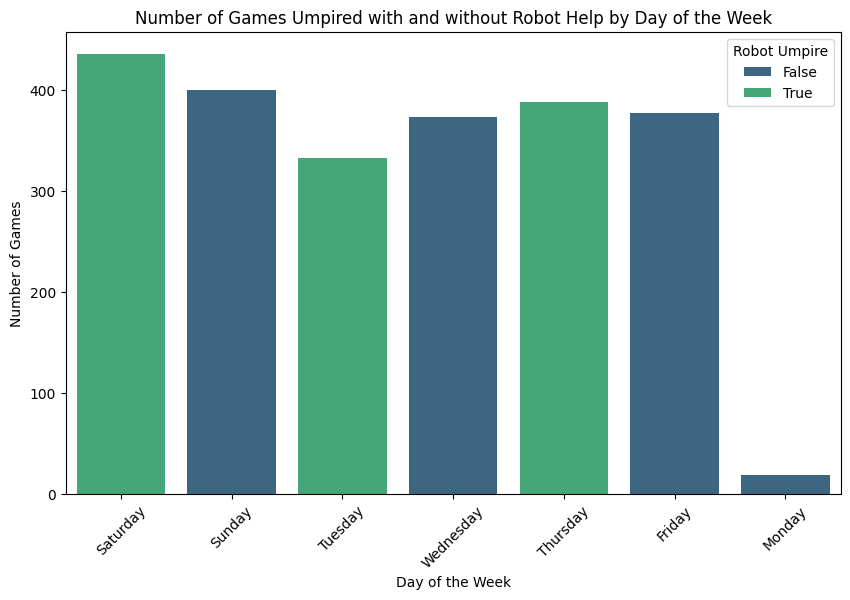

<ipython-input-16-aaad43ab6b06>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='robot_umpire', y='teams.home.score', data=game_data, palette='viridis')


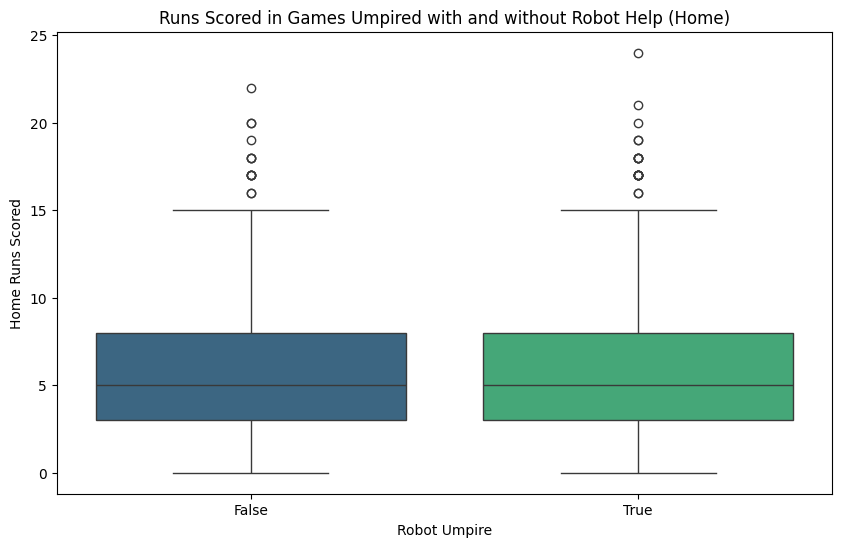

<ipython-input-16-aaad43ab6b06>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='robot_umpire', y='teams.away.score', data=game_data, palette='viridis')


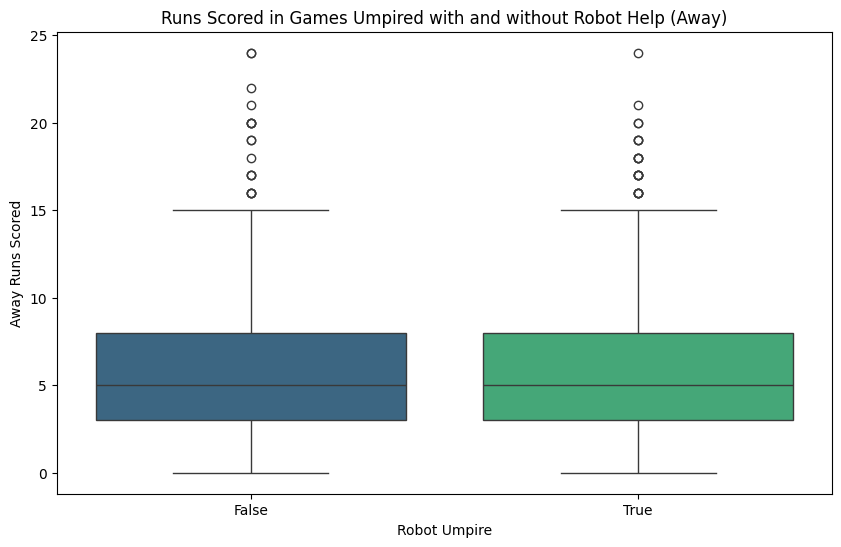

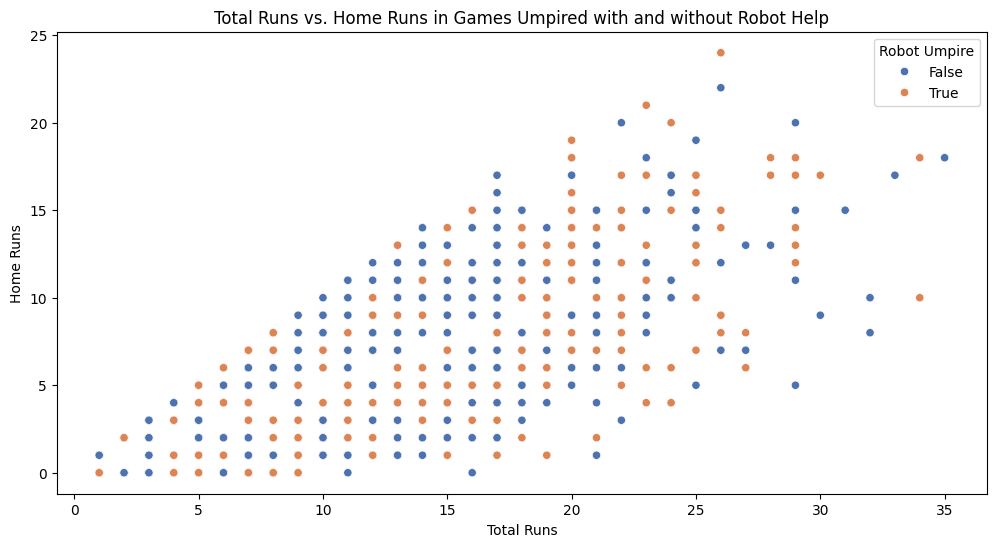

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the game data
game_data = pd.read_csv('aaa_games_2023.csv')

# Display the first few rows and column headers of the dataset
print(game_data.head())
print(game_data.columns)

# Add a column to indicate if the game was umpired with robot help
game_data['game_date'] = pd.to_datetime(game_data['officialDate'])
game_data['day_of_week'] = game_data['game_date'].dt.day_name()
game_data['robot_umpire'] = game_data['day_of_week'].isin(['Tuesday', 'Thursday', 'Saturday'])

# Display the first few rows of the updated dataframe
print(game_data.head())

# Save the updated data to a new CSV file
game_data.to_csv('aaa_games_2023_updated.csv', index=False)

# Plot the distribution of games umpired with and without robot help
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', hue='robot_umpire', data=game_data, palette='viridis')
plt.title('Number of Games Umpired with and without Robot Help by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Games')
plt.legend(title='Robot Umpire')
plt.xticks(rotation=45)
plt.show()

# Average runs scored in games umpired with and without robot help
plt.figure(figsize=(10, 6))
sns.boxplot(x='robot_umpire', y='teams.home.score', data=game_data, palette='viridis')
plt.title('Runs Scored in Games Umpired with and without Robot Help (Home)')
plt.xlabel('Robot Umpire')
plt.ylabel('Home Runs Scored')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='robot_umpire', y='teams.away.score', data=game_data, palette='viridis')
plt.title('Runs Scored in Games Umpired with and without Robot Help (Away)')
plt.xlabel('Robot Umpire')
plt.ylabel('Away Runs Scored')
plt.show()

# Scatter plot of total runs vs. home runs in games umpired with and without robot help
game_data['total_runs'] = game_data['teams.home.score'] + game_data['teams.away.score']
plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_runs', y='teams.home.score', hue='robot_umpire', data=game_data, palette='deep')
plt.title('Total Runs vs. Home Runs in Games Umpired with and without Robot Help')
plt.xlabel('Total Runs')
plt.ylabel('Home Runs')
plt.legend(title='Robot Umpire')
plt.show()


In [17]:
import pandas as pd

# Load the game data
game_data = pd.read_csv('aaa_games_2023.csv')

# Add a column to indicate if the game was umpired with robot help
game_data['game_date'] = pd.to_datetime(game_data['officialDate'])
game_data['day_of_week'] = game_data['game_date'].dt.day_name()
game_data['robot_umpire'] = game_data['day_of_week'].isin(['Tuesday', 'Thursday', 'Saturday'])

# Display the first few rows of the updated dataframe
print(game_data.head())

# Create a new CSV file with the updated information
game_data.to_csv('aaa_games_2023_with_umpires.csv', index=False)

# Check the distribution of games with and without robot umpires
print(game_data['robot_umpire'].value_counts())


   game_pk                              gameGuid  \
0   723759  a818fef5-04dd-434f-ab21-aaef732b4ae5   
1   723029  061e1f3b-9a98-470c-97e5-6f6671cc4227   
2   723604  7cec04c7-21ff-49fc-89fc-1b7150a7c7e5   
3   721507  e2455e9f-f519-40b9-a3f4-0827ff32f9fc   
4   721508  ee389b10-c958-475d-80f3-b84fded3d4b1   

                              link gameType  season              gameDate  \
0  /api/v1.1/game/723759/feed/live        R    2023  2023-04-01T17:05:00Z   
1  /api/v1.1/game/723029/feed/live        R    2023  2023-04-01T17:05:00Z   
2  /api/v1.1/game/723604/feed/live        R    2023  2023-04-01T17:35:00Z   
3  /api/v1.1/game/721507/feed/live        R    2023  2023-04-01T18:05:00Z   
4  /api/v1.1/game/721508/feed/live        R    2023  2023-04-01T18:10:00Z   

  officialDate  isTie  gameNumber  publicFacing  ... status.reason  \
0   2023-04-01  False           1          True  ...           NaN   
1   2023-04-01  False           1          True  ...           NaN   
2   2023-04-01